# Image prediction Using PCA and Neural Networks

This notebook firsy reduces dimensionality using PCA and then uses a neural net model for prediction

### Import relevant files, import data and create test and train datasets

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

#loads data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


print(f"x_train shape: {x_train.shape}")  # (60000, 28, 28)
print(f"x_test shape: {x_test.shape}")    # (10000, 28, 28)

#normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_test = y_test[15:]
# reshape to vector matrix
x_train = x_train.reshape(-1, 28 * 28)  # Flatten to (60000, 784)
x_test = x_test[15:].reshape(-1, 28 * 28)




x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


### Scale data

In [113]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)





### Do PCA with 10, 25 and 100 principal components.

Combine with a basic MLP neural network model  with 2 hidden layers. Review model stats for each of the 3 models. 

In [ ]:
def train_model_with_pca_and_report(n_components):
    # Apply PCA
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    #cretae model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(n_components,)),  # Input layer
        Dropout(0.3),  # Dropout for regularization
        Dense(64, activation='sigmoid'),  # First hidden layer
        Dense(32, activation='sigmoid'),  # Second hidden layer
        Dense(10, activation='softmax')  # Output layer (10 classes)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #train
    print(f"\nTraining model with {n_components} principal components...")
    model.fit(x_train_pca, y_train, epochs=20, batch_size=64, validation_data=(x_test_pca, y_test), verbose=1)

    #evaluate
    test_loss, test_accuracy = model.evaluate(x_test_pca, y_test, verbose=0)
    print(f"Test Accuracy with {n_components} components: {test_accuracy:.4f}")


    y_pred = np.argmax(model.predict(x_test_pca), axis=1)
    print(f"\nClassification Report for {n_components} Components:")
    print(classification_report(y_test, y_pred, target_names=[
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]))

    return model, pca

#train with 10, 25, and 100 principal components
model_10, pca_10 = train_model_with_pca_and_report(10)
model_25, pca_25 = train_model_with_pca_and_report(25)
model_100, pca_100 = train_model_with_pca_and_report(100)


Training model with 10 principal components...
Epoch 1/20


C:\Users\scd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6167 - loss: 1.3427 - val_accuracy: 0.7525 - val_loss: 0.6581
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7599 - loss: 0.6404 - val_accuracy: 0.7890 - val_loss: 0.5781
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7866 - loss: 0.5749 - val_accuracy: 0.7980 - val_loss: 0.5479
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7996 - loss: 0.5436 - val_accuracy: 0.8030 - val_loss: 0.5339
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7985 - loss: 0.5381 - val_accuracy: 0.8067 - val_loss: 0.5202
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8063 - loss: 0.5166 - val_accuracy: 0.8065 - val_loss: 0.5213
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8063 - loss: 0.5167 - val_accuracy: 0.8107 - val_loss: 0.5085
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8099 - loss: 0.5092 - val_accuracy: 0.8093 - val_

C:\Users\scd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6457 - loss: 1.2856 - val_accuracy: 0.8083 - val_loss: 0.5443
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8165 - loss: 0.5175 - val_accuracy: 0.8296 - val_loss: 0.4744
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8332 - loss: 0.4641 - val_accuracy: 0.8395 - val_loss: 0.4461
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8377 - loss: 0.4423 - val_accuracy: 0.8412 - val_loss: 0.4364
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8462 - loss: 0.4237 - val_accuracy: 0.8442 - val_loss: 0.4253
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8458 - loss: 0.4192 - val_accuracy: 0.8481 - val_loss: 0.4162
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8478 - loss: 0.4122 - val_accuracy: 0.8514 - val_loss: 0.4067
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8520 - loss: 0.3998 - val_accuracy: 0.8547 - val_

C:\Users\scd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6728 - loss: 1.2123 - val_accuracy: 0.8408 - val_loss: 0.4651
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8496 - loss: 0.4335 - val_accuracy: 0.8591 - val_loss: 0.4075
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8612 - loss: 0.3855 - val_accuracy: 0.8661 - val_loss: 0.3754
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8692 - loss: 0.3623 - val_accuracy: 0.8705 - val_loss: 0.3611
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8766 - loss: 0.3431 - val_accuracy: 0.8744 - val_loss: 0.3508
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8786 - loss: 0.3302 - val_accuracy: 0.8743 - val_loss: 0.3444
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8812 - loss: 0.3253 - val_accuracy: 0.8747 - val_loss: 0.3452
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8862 - loss: 0.3155 - val_accuracy: 0.8798 - val_

### View the predicted classes with each of the 3 models (10, 25, 100 principal components)

Predictions for Model with 10 Principal Components


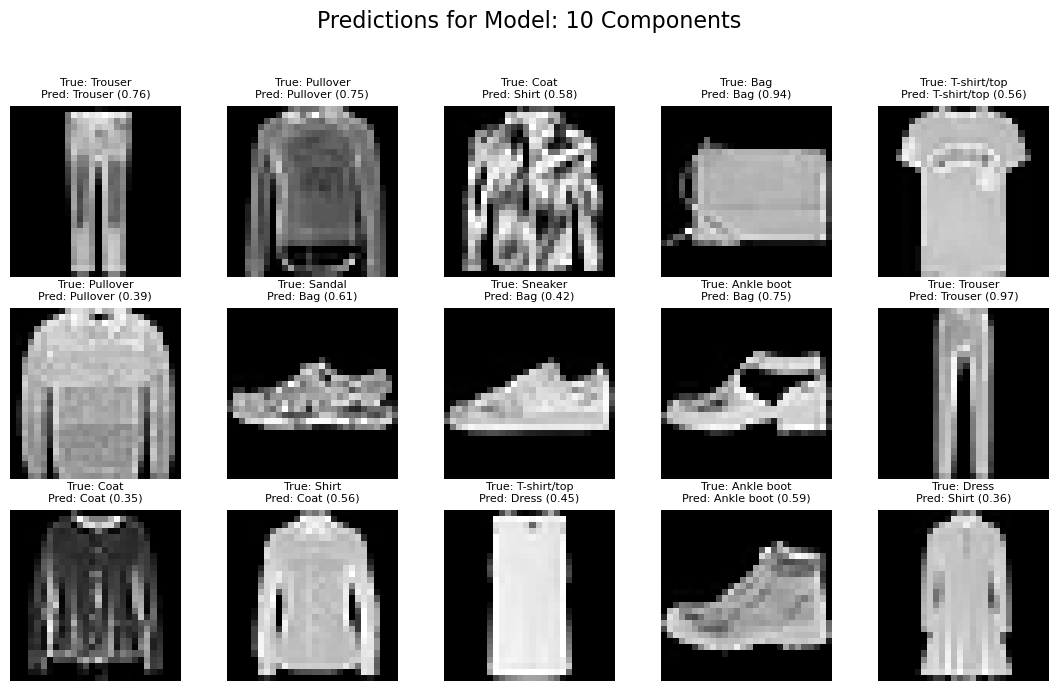

Predictions for Model with 25 Principal Components


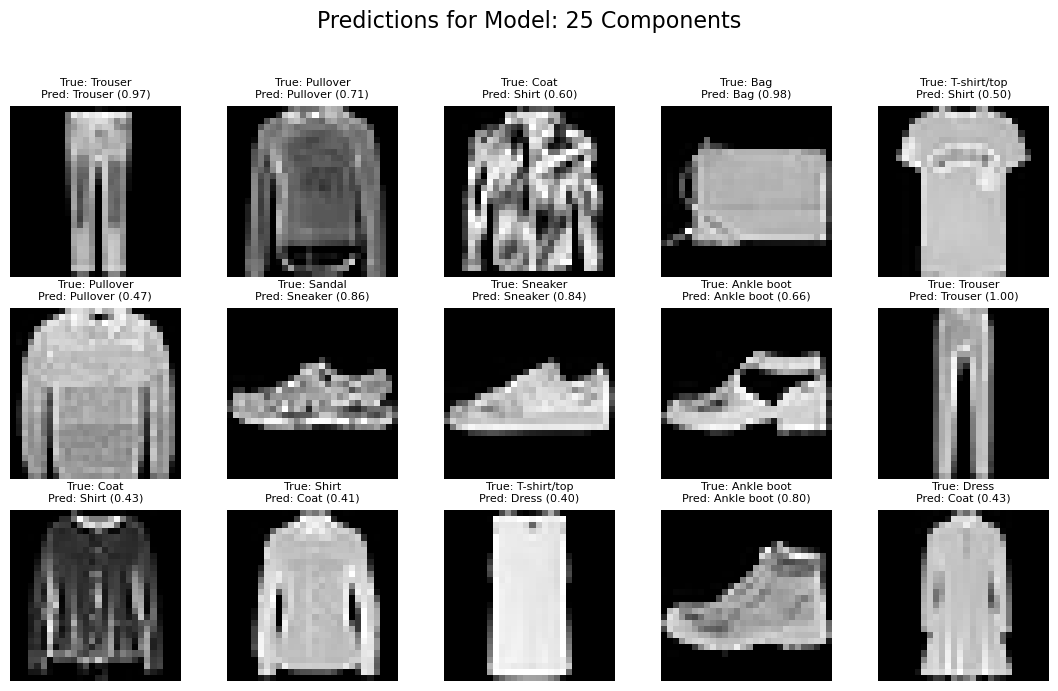

Predictions for Model with 100 Principal Components


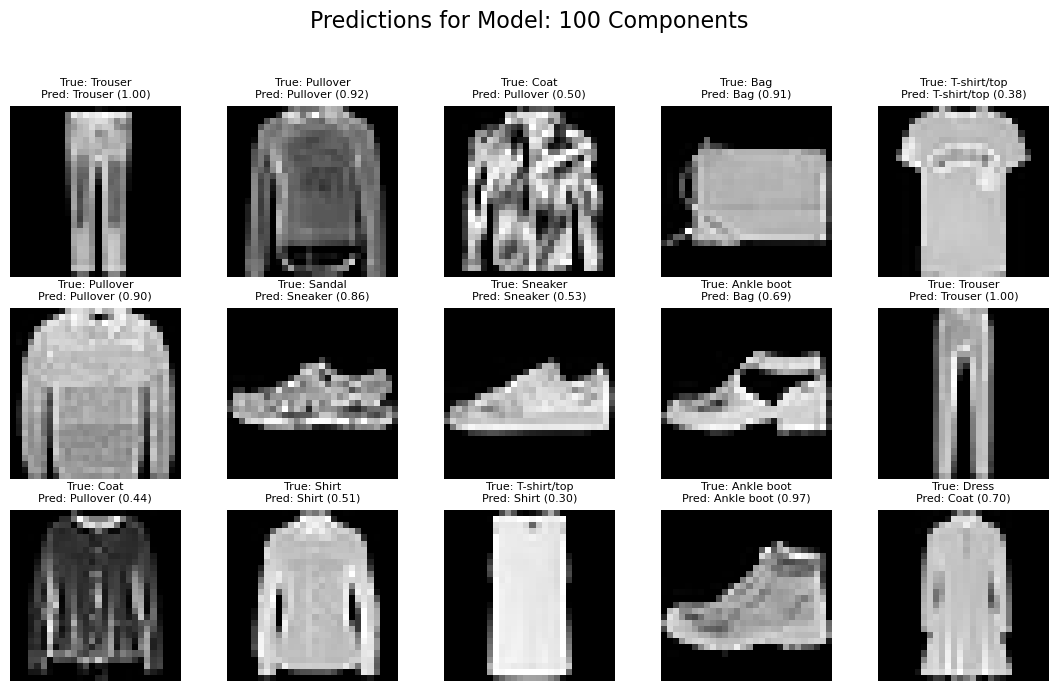

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#just a function to display the images from dataset
def visualize_predictions_for_model(model_name, model, pca, x_test, y_test, start_index=0):
    """
    Visualize predictions for 15 test images using a trained model in a 3x5 grid.

    Args:
        model_name (str): Name of the model for display in the title.
        model: Trained Keras model.
        pca: PCA object used for dimensionality reduction.
        x_test (ndarray): Test dataset features (original 784 dimensions).
        y_test (ndarray): Test dataset labels (integer labels).
        start_index (int): Starting index of the test images.
    """
   
    fig, axes = plt.subplots(3, 5, figsize=(11, 7))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        current_index = start_index + i

       
        image = x_test[current_index].reshape(28, 28)

       
        x_test_pca_sample = pca.transform(x_test[current_index].reshape(1, -1))

        # Predict the class probabilities
        predicted_probs = model.predict(x_test_pca_sample, verbose=0)
        predicted_label = np.argmax(predicted_probs)
        predicted_prob = predicted_probs[0][predicted_label]

    
        true_label = y_test[current_index]

    
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(
            f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]} ({predicted_prob:.2f})",
            fontsize=8
        )

    plt.suptitle(f"Predictions for Model: {model_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title space
    plt.show()

# shows predictions of each te the neural networks with 10, 25, and 100 principal components
print("Predictions for Model with 10 Principal Components")
visualize_predictions_for_model("10 Components", model_10, pca_10, x_test, y_test)

print("Predictions for Model with 25 Principal Components")
visualize_predictions_for_model("25 Components", model_25, pca_25, x_test, y_test)

print("Predictions for Model with 100 Principal Components")
visualize_predictions_for_model("100 Components", model_100, pca_100, x_test, y_test)

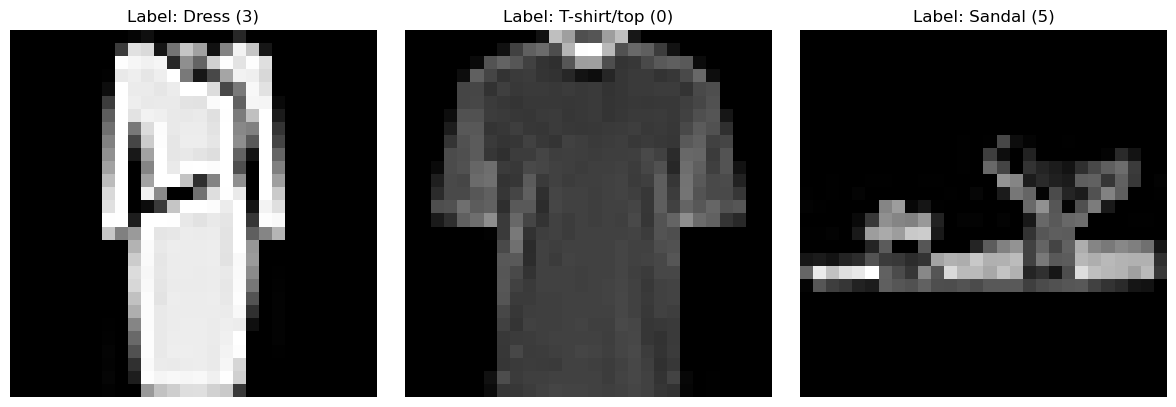

In [135]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Function to display the last 3 images in the training data
def show_last_images(x_data, y_data):
    """
    Display the last 3 images from the training data along with their labels.

    Args:
        x_data (ndarray): Training data features.
        y_data (ndarray): Training data labels.
    """
    num_images = 3
    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

    for i, ax in enumerate(axes):
        # Index for the last 3 images
        idx = -num_images + i

        # Reshape the image back to 28x28 for display
        image = x_data[idx].reshape(28, 28)

        # Get the label and class name
        label = y_data[idx]
        class_name = class_names[label]

        # Display the image
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {class_name} ({label})")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Show the last 3 images in the training data
show_last_images(x_train, y_train)

### See the [PDF Report](unsupervised_learning_report.pdf) for detailed conclusions of the model